# Análise de Dados: Casos de Suicídio no Brasil

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
drive.mount('/content/drive')
caminho_arquivo = '/content/drive/MyDrive/csv_suicidio/SIM_UNIFICADO_FINAL.csv'
suicidio = pd.read_csv(caminho_arquivo, encoding='latin-1', sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mapeia os valores numéricos para descrições textuais
map_racacor = {1.0: 'branca', 2.0: 'preta', 3.0: 'amarela', 4.0: 'parda', 5.0: 'indigena'}
suicidio['RACACOR'] = suicidio['RACACOR'].replace(map_racacor)

map_sexo = {1.0: 'M', 2.0: 'F'}
suicidio['SEXO'] = suicidio['SEXO'].replace(map_sexo)

map_estciv = {1.0: 'solteiro', 2.0: 'casado', 3.0: 'viuvo', 4.0: 'separado', 5.0: 'uniao_consensual', 9.0: 'ignorado'}
suicidio['ESTCIV'] = suicidio['ESTCIV'].replace(map_estciv)

map_esc2010 = {0.0: 'sem escolaridade', 1.0: 'fundamental_1', 2.0: 'fundamental_2', 3.0: 'ensino_medio', 4.0: 'superior_incompleto', 5.0: 'superior_completo', 9.0: 'ignorado'}
suicidio['ESC2010'] = suicidio['ESC2010'].replace(map_esc2010)

map_lococor = {1.0: 'hospital', 2.0: 'outro_estabelecimento_saude', 3.0: 'domicilio', 4.0: 'vias_publicas', 5.0: 'outros'}
suicidio['LOCOCOR'] = suicidio['LOCOCOR'].replace(map_lococor)

print("\nDataFrame após as transformações:")
print(suicidio.head())


DataFrame após as transformações:
  ESTADO   ANO  TIPOBITO  IDADE SEXO RACACOR            ESTCIV  \
0     AC  2014         2     36    M   preta            casado   
1     AC  2014         2     47    M  branca  uniao_consensual   
2     AC  2014         2     70    M  branca          ignorado   
3     AC  2014         2     14    M  branca          solteiro   
4     AC  2014         2     50    M   parda          solteiro   

             ESC2010    LOCOCOR  CAUSABAS  CIRCOBITO  
0      fundamental_2  domicilio  X700            2.0  
1  superior_completo  domicilio  X800            2.0  
2           ignorado  domicilio  X700            2.0  
3      fundamental_2     outros  X700            2.0  
4       ensino_medio  domicilio  X700            2.0  


## Hipóteses Iniciais

Com base nas perguntas norteadoras do projeto e em pesquisas sobre o tema, formulamos as seguintes hipóteses para guiar a análise exploratória dos dados:

**H1: Gênero e Suicídio:** A taxa de suicídio é significativamente maior entre homens do que entre mulheres no Brasil, refletindo o "paradoxo de gênero" no comportamento suicida, onde homens tendem a usar métodos mais letais.

**H2: Raça/Cor e Suicídio:** A incidência de suicídio varia entre diferentes grupos raciais, com taxas desproporcionalmente altas entre as populações branca e parda, mas também com variações importantes que podem indicar disparidades sociais e de acesso à saúde mental.

**H3: Faixa Etária e Suicídio:** Existe uma concentração de casos de suicídio em faixas etárias específicas, particularmente entre jovens adultos (20-39 anos), mas com um aumento preocupante também em idades mais avançadas, sugerindo diferentes fatores de risco ao longo do ciclo de vida.

**H4: Sazonalidade:** Os casos de suicídio apresentam um padrão de sazonalidade, com um número maior de ocorrências em determinados meses do ano, o que pode estar associado a fatores climáticos, sociais ou culturais.

## Análise Exploratória

### Porcentagens de casos por sexo


ANÁLISE DA DISTRIBUIÇÃO POR SEXO

Contagem de casos de suicídio por sexo:
SEXO
M    80923
F    22303
Name: count, dtype: int64

Porcentagem de casos de suicídio por sexo:
SEXO
M    78.394009
F    21.605991
Name: proportion, dtype: float64


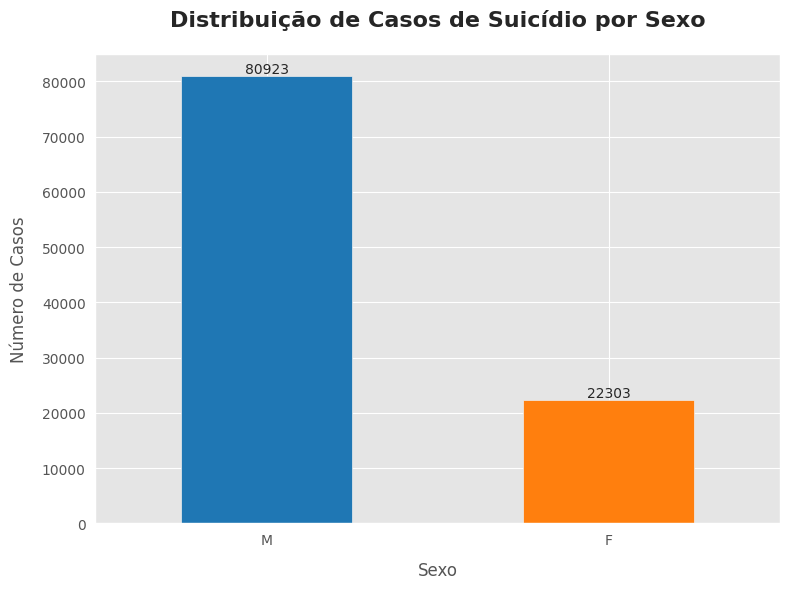

In [ ]:
suicidio = suicidio[suicidio['SEXO'] != 0]
distribuicao_sexo = suicidio['SEXO'].value_counts()
porcentagem_sexo = suicidio['SEXO'].value_counts(normalize=True) * 100

print("\nANÁLISE DA DISTRIBUIÇÃO POR SEXO")
print("\nContagem de casos de suicídio por sexo:")
print(distribuicao_sexo)
print("\nPorcentagem de casos de suicídio por sexo:")
print(porcentagem_sexo)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))

distribuicao_sexo.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'])
ax.set_title('Distribuição de Casos de Suicídio por Sexo', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Sexo', fontsize=12, labelpad=10)
ax.set_ylabel('Número de Casos', fontsize=12, labelpad=10)
plt.xticks(rotation=0)

for i, count in enumerate(distribuicao_sexo):
    ax.text(i, count + 50, f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Discussão dos Resultados - Gênero

Os dados confirmam a **Hipótese 1 (H1)** de forma convincente. A análise da distribuição por sexo revela uma disparidade significativa, com **78,4%** dos casos de suicídio no período analisado ocorrendo entre homens, em comparação com **21,6%** entre mulheres. Em números absolutos, isso representa 80.923 casos para o sexo masculino e 22.303 para o feminino.

Esta descoberta está alinhada com o fenômeno conhecido como "paradoxo de gênero no suicídio", onde as tentativas de suicídio são frequentemente mais comuns em mulheres, mas a taxa de suicídio consumado é consideravelmente maior em homens. A literatura sugere que isso se deve, em parte, à escolha de métodos mais letais pelos homens.

**Implicações para a APS:**
- As campanhas de prevenção ao suicídio devem ter uma comunicação direcionada e sensível às questões de masculinidade e saúde mental masculina.
- É crucial desmistificar a ideia de que procurar ajuda é um sinal de fraqueza, um estigma que afeta desproporcionalmente os homens.
- Estratégias de abordagem na Atenção Primária podem ser desenvolvidas para identificar sinais de sofrimento psíquico em homens durante consultas de rotina, mesmo que a queixa principal não seja relacionada à saúde mental.

### DISTRIBUIÇÃO POR SEXO E ESTADO


DISTRIBUIÇÃO DE CASOS POR SEXO EM CADA ESTADO (CONTAGEM)
SEXO       F      M
ESTADO             
AC       117    378
AL       121    402
AM        97    300
AP       427   1706
BA       909   4203
CE      1029   4167
DF       397   1138
ES       428   1180
GO      1019   3526
MA       490   1934
MG       391   1368
MS       488   1701
MT      2673   9603
PA       580   2062
PB       297   1086
PE       559   2016
PI      1509   5957
PR       813   2708
RJ      1529   4197
RN       208    832
RO        83    220
RR      2068   8224
RS       244    780
SC      1375   4801
SE      4002  14772
SP       235    880
TO       215    782

DISTRIBUIÇÃO DE CASOS POR SEXO EM CADA ESTADO (PORCENTAGEM)
SEXO            F          M
ESTADO                      
AC      23.636364  76.363636
AL      23.135755  76.864245
AM      24.433249  75.566751
AP      20.018753  79.981247
BA      17.781690  82.218310
CE      19.803695  80.196305
DF      25.863192  74.136808
ES      26.616915  73.383085
GO      22.

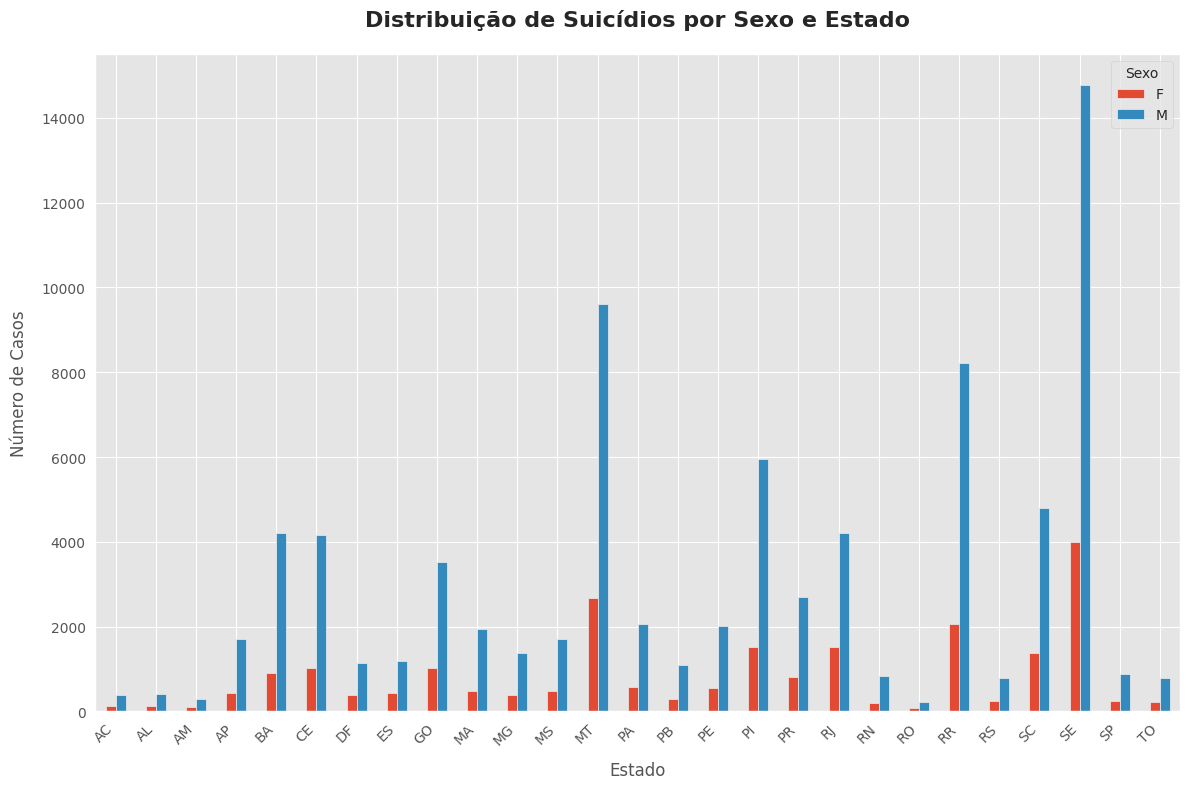

In [ ]:
dist_sexo_estado = pd.crosstab(suicidio['ESTADO'], suicidio['SEXO'])

print("\nDISTRIBUIÇÃO DE CASOS POR SEXO EM CADA ESTADO (CONTAGEM)")
print(dist_sexo_estado)

dist_sexo_estado_pct = pd.crosstab(suicidio['ESTADO'], suicidio['SEXO'], normalize='index') * 100

print("\nDISTRIBUIÇÃO DE CASOS POR SEXO EM CADA ESTADO (PORCENTAGEM)")
print(dist_sexo_estado_pct)

fig, ax = plt.subplots(figsize=(12, 8))
dist_sexo_estado.plot(kind='bar', ax=ax)

ax.set_title('Distribuição de Suicídios por Sexo e Estado', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Estado', fontsize=12, labelpad=10)
ax.set_ylabel('Número de Casos', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo', loc='upper right')

plt.tight_layout()
plt.show()

### Discussão dos Resultados - Gênero e Estado

Ao segmentar a análise por estado, observamos que a predominância de casos de suicídio no sexo masculino é um padrão consistente em todo o Brasil. Não há nenhum estado em que o número de casos no sexo feminino se aproxime do masculino.

No entanto, a proporção varia entre os estados. Por exemplo, enquanto no **Rio de Janeiro (RJ)** a proporção de casos femininos é de **26,7%**, na **Bahia (BA)**, esse número cai para **17,8%**. Isso sugere que, embora a questão de gênero seja universal, fatores regionais e culturais podem influenciar a magnitude dessa disparidade.

**Implicações para a APS:**
- As estratégias de prevenção devem ser adaptadas às realidades locais. Em estados com uma disparidade de gênero ainda maior, como a Bahia, as ações focadas no público masculino podem ser ainda mais prioritárias.
- A análise comparativa entre estados pode levantar novas hipóteses: o que faz com que a proporção de suicídios femininos seja maior em alguns lugares do que em outros? Fatores como acesso a serviços de saúde, redes de apoio, violência de gênero e condições socioeconômicas podem ser investigados em análises futuras.

### DISTRIBUIÇÃO POR SEXO, ESTADO E ANO


DISTRIBUIÇÃO DE CASOS POR SEXO, ESTADO E ANO (CONTAGEM)
Os dados estão agrupados por 'ANO' e depois por 'ESTADO'.
SEXO           F     M
ANO  ESTADO           
2014 AC        4    38
     AL       10    20
     AM        3    28
     AP       37   159
     BA       70   286
...          ...   ...
2022 RS       33   104
     SC      200   671
     SE      546  2103
     SP       34   124
     TO       31   114

[242 rows x 2 columns]


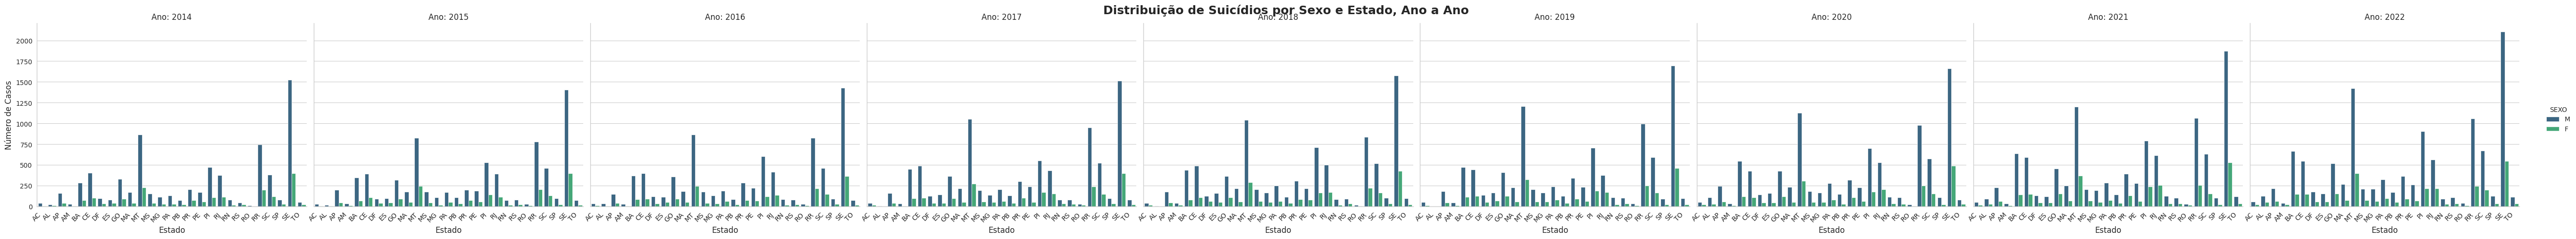

In [ ]:
dist_sexo_estado_ano = pd.crosstab([suicidio['ANO'], suicidio['ESTADO']], suicidio['SEXO'])

print("\nDISTRIBUIÇÃO DE CASOS POR SEXO, ESTADO E ANO (CONTAGEM)")
print("Os dados estão agrupados por 'ANO' e depois por 'ESTADO'.")
print(dist_sexo_estado_ano)

sns.set_style("whitegrid")

g = sns.catplot(
    data=suicidio,
    x='ESTADO',
    hue='SEXO',
    col='ANO',
    kind='count',
    palette='viridis',
    height=5,
    aspect=1.2,
    sharey=True
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribuição de Suicídios por Sexo e Estado, Ano a Ano', fontsize=18, fontweight='bold')

g.set_axis_labels("Estado", "Número de Casos")
g.set_xticklabels(rotation=45, ha="right")
g.set_titles(col_template="Ano: {col_name}")

plt.show()

### Discussão dos Resultados - Gênero, Estado e Ano

A análise ano a ano por estado e gênero nos permite observar a evolução do número de casos. O `Facet Grid` acima mostra que, em geral, há uma tendência de **aumento no número de casos** para ambos os sexos na maioria dos estados ao longo do período de 2014 a 2018 (e, como vimos na análise de tendência anual, isso continua até 2022).

Esta visualização é poderosa para identificar anomalias ou mudanças abruptas em anos específicos para determinados estados. Por exemplo, podemos verificar se algum estado teve um pico de casos em um ano específico, o que poderia ser um ponto de partida para uma investigação mais aprofundada sobre os fatores contextuais daquele ano (crises econômicas locais, desastres, etc.).

**Implicações para a APS:**
- O monitoramento contínuo desses dados é fundamental. A APS pode usar dashboards atualizados para acompanhar a tendência em sua região e responder rapidamente a aumentos inesperados no número de casos.
- A tendência de crescimento geral reforça a urgência de fortalecer as políticas de saúde mental e as ações de prevenção em todo o país.

## Distribuição por Raça/Cor (RACACOR)

ANÁLISE DA DISTRIBUIÇÃO POR RAÇA/COR

Contagem de casos de suicídio por raça/cor:
RACACOR
branca      51206
parda       43841
preta        5538
indigena     1054
amarela       368
Name: count, dtype: int64

Porcentagem de casos de suicídio por raça/cor:
RACACOR
branca      50.198516
parda       42.978423
preta        5.429039
indigena     1.033262
amarela      0.360760
Name: proportion, dtype: float64


/tmp/ipython-input-3713330572.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distribuicao_racacor.index, y=distribuicao_racacor.values, palette='plasma')


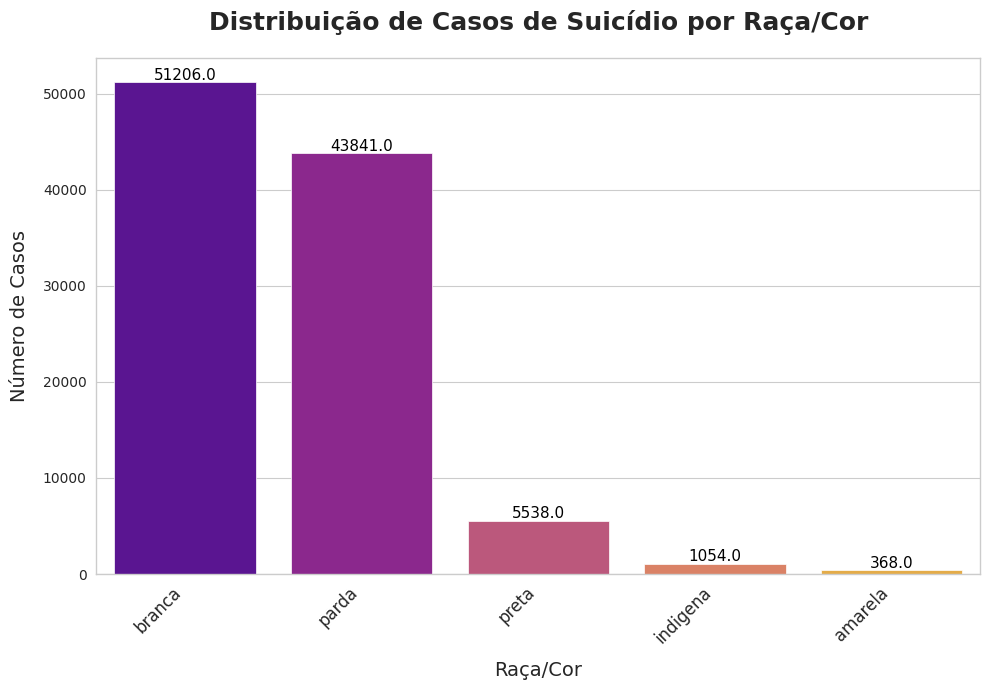

In [ ]:
distribuicao_racacor = suicidio['RACACOR'].value_counts()
porcentagem_racacor = suicidio['RACACOR'].value_counts(normalize=True) * 100

print("ANÁLISE DA DISTRIBUIÇÃO POR RAÇA/COR")
print("\nContagem de casos de suicídio por raça/cor:")
print(distribuicao_racacor)
print("\nPorcentagem de casos de suicídio por raça/cor:")
print(porcentagem_racacor)

distribuicao_racacor = distribuicao_racacor.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=distribuicao_racacor.index, y=distribuicao_racacor.values, palette='plasma')

ax.set_title('Distribuição de Casos de Suicídio por Raça/Cor', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Raça/Cor', fontsize=14, labelpad=10)
ax.set_ylabel('Número de Casos', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

### Discussão dos Resultados - Raça/Cor

A análise por raça/cor, em números absolutos, mostra que a maioria dos casos de suicídio ocorre entre pessoas **brancas (50,2%)** e **pardas (43,0%)**. Pessoas pretas representam 5,4% dos casos, indígenas 1,0% e amarelas 0,4%.

**Cuidado na Interpretação:** É fundamental interpretar esses dados com cautela. Os números absolutos podem ser influenciados pela distribuição demográfica da população brasileira. Para uma análise mais precisa sobre o risco, seria necessário calcular as **taxas de suicídio por 100 mil habitantes** para cada grupo racial, utilizando dados populacionais do IBGE para o mesmo período. Sem essa normalização, não podemos confirmar a **Hipótese 2 (H2)** sobre a variação da incidência.

No entanto, mesmo sem as taxas, os dados indicam que as ações de prevenção devem ter um foco importante nas populações branca e parda, que concentram a grande maioria dos casos. A análise por raça também pode ser aprofundada ao cruzar com outras variáveis, como estado e faixa etária, para identificar subgrupos de risco ainda mais específicos.

**Implicações para a APS:**
- As campanhas devem ser culturalmente sensíveis e considerar as especificidades de cada grupo racial.
- A Atenção Primária pode estar atenta a fatores de risco que afetam desproporcionalmente certos grupos, como o racismo estrutural, a discriminação e as desigualdades socioeconômicas, que são conhecidos por impactar a saúde mental.

###  DISTRIBUIÇÃO POR RAÇA/COR E ANO

DISTRIBUIÇÃO DE CASOS POR RAÇA/COR AO LONGO DOS ANOS (CONTAGEM)
RACACOR  amarela  branca  indigena  parda  preta
ANO                                             
2014          42    4644        95   3503    481
2015          47    4800       111   3758    480
2016          33    5044       106   3971    522
2017          46    5522       135   4529    588
2018          39    5696       123   4746    582
2019          27    6035       111   5167    614
2020          44    5964       107   5428    688
2021          40    6477       141   6219    750
2022          50    7024       125   6520    833


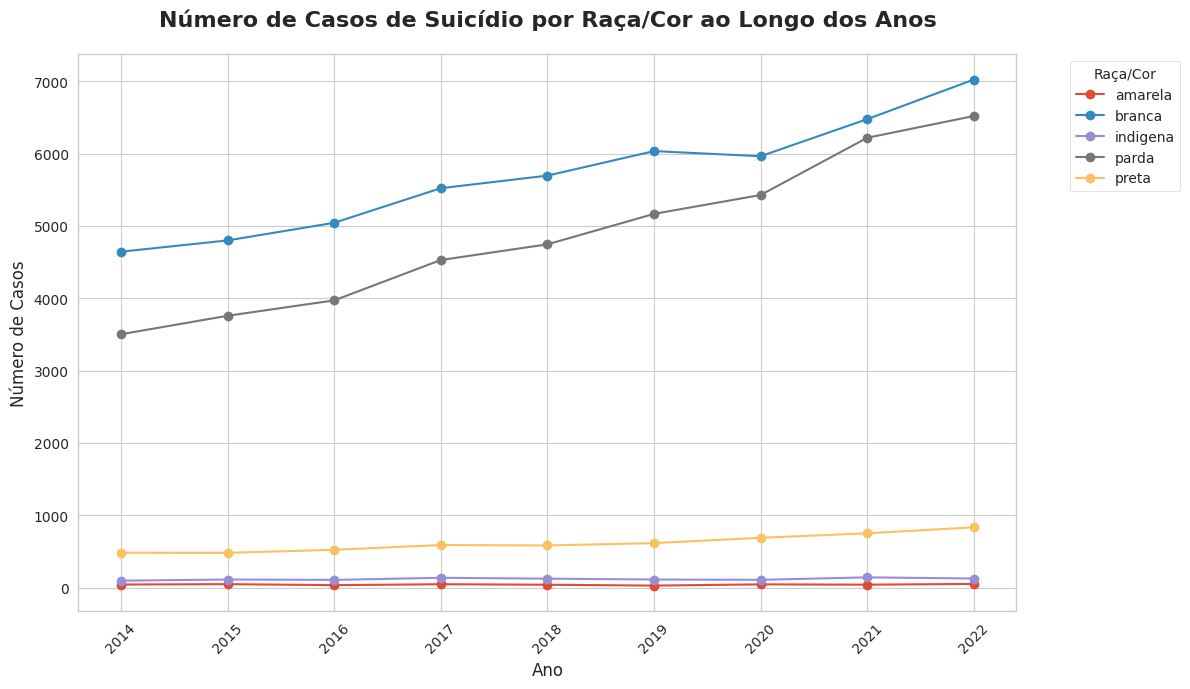

In [ ]:
dist_racacor_ano = pd.crosstab(suicidio['ANO'], suicidio['RACACOR'])

print("DISTRIBUIÇÃO DE CASOS POR RAÇA/COR AO LONGO DOS ANOS (CONTAGEM)")
print(dist_racacor_ano)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

dist_racacor_ano.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Número de Casos de Suicídio por Raça/Cor ao Longo dos Anos', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(dist_racacor_ano.index, rotation=45)
plt.legend(title='Raça/Cor', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Discussão dos Resultados - Raça/Cor e Ano

O gráfico de linhas mostra a tendência de crescimento no número de casos de suicídio para todos os grupos raciais ao longo dos anos. O aumento é mais pronunciado para as populações **branca** e **parda**, que já representam a maioria dos casos.

É interessante notar que a linha da população **preta** também mostra um crescimento consistente, indicando que este é um problema crescente para todos os grupos. A população **indígena**, embora com números absolutos menores, também apresenta uma tendência de aumento, o que é particularmente preocupante dadas as vulnerabilidades específicas desse grupo.

**Implicações para a APS:**
- A tendência de crescimento em todos os grupos reforça a necessidade de políticas de saúde mental mais abrangentes e inclusivas.
- A APS em territórios com maior presença de populações específicas (como áreas com grande população indígena ou quilombola) deve estar preparada para oferecer um cuidado culturalmente adequado e atento às tendências de crescimento de casos nesses grupos.

### CASOS POR RAÇA/COR E GÊNERO (CONTAGEM)

DISTRIBUIÇÃO DE CASOS POR RAÇA/COR E GÊNERO (CONTAGEM)
SEXO          F      M
RACACOR               
amarela      94    274
branca    12106  39100
indigena    255    799
parda      8545  35296
preta      1031   4507

DISTRIBUIÇÃO DE CASOS POR RAÇA/COR E GÊNERO (PORCENTAGEM)
SEXO              F          M
RACACOR                       
amarela   25.543478  74.456522
branca    23.641761  76.358239
indigena  24.193548  75.806452
parda     19.490888  80.509112
preta     18.616829  81.383171


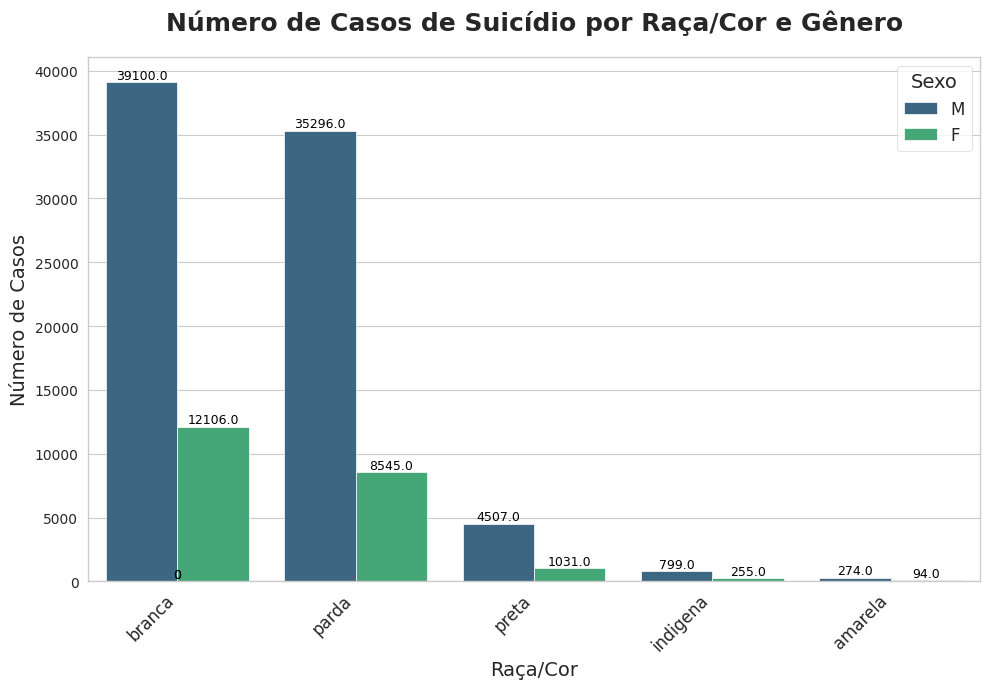

In [ ]:
dist_racacor_sexo = pd.crosstab(suicidio['RACACOR'], suicidio['SEXO'])

print("DISTRIBUIÇÃO DE CASOS POR RAÇA/COR E GÊNERO (CONTAGEM)")
print(dist_racacor_sexo)

dist_racacor_sexo_pct = pd.crosstab(suicidio['RACACOR'], suicidio['SEXO'], normalize='index') * 100

print("\nDISTRIBUIÇÃO DE CASOS POR RAÇA/COR E GÊNERO (PORCENTAGEM)")
print(dist_racacor_sexo_pct)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))

ax = sns.countplot(
    data=suicidio,
    x='RACACOR',
    hue='SEXO',
    palette='viridis',
    order=suicidio['RACACOR'].value_counts().index
)

plt.title('Número de Casos de Suicídio por Raça/Cor e Gênero', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Raça/Cor', fontsize=14)
plt.ylabel('Número de Casos', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Sexo', fontsize=12, title_fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

### Discussão dos Resultados - Raça/Cor e Gênero

Esta análise cruzada revela que a disparidade de gênero se mantém em todos os grupos raciais. Em todas as categorias de raça/cor, o número de suicídios de homens é substancialmente maior do que o de mulheres.

Curiosamente, a proporção de casos masculinos é um pouco maior nas populações **parda (80,5%)** e **preta (81,4%)** em comparação com a população **branca (76,4%)**. Isso pode indicar que os fatores de risco associados ao gênero são intensificados por questões raciais e socioeconômicas. Homens negros e pardos podem enfrentar uma "dupla vulnerabilidade", onde o estigma de gênero sobre a saúde mental se soma ao impacto do racismo e da exclusão social.

**Implicações para a APS:**
- As estratégias de prevenção para homens devem ser ainda mais interseccionais, considerando como a raça e a classe social interagem com as questões de gênero.
- É fundamental que os profissionais da APS estejam cientes dessas múltiplas camadas de vulnerabilidade para oferecer um cuidado mais eficaz e equitativo.

###  POR FAIXA ETÁRIA

--- ANÁLISE DA DISTRIBUIÇÃO POR FAIXA ETÁRIA ---

Contagem de casos de suicídio por faixa etária:
FAIXA_ETARIA
0-9         35
10-19     8476
20-29    20912
30-39    21420
40-49    18719
50-59    15517
60-69    10031
70-79     5609
80-89     2089
90+        418
Name: count, dtype: int64

Porcentagem de casos de suicídio por faixa etária:
FAIXA_ETARIA
0-9       0.033906
10-19     8.211110
20-29    20.258462
30-39    20.750586
40-49    18.133997
50-59    15.032066
60-69     9.717513
70-79     5.433709
80-89     2.023715
90+       0.404937
Name: proportion, dtype: float64


/tmp/ipython-input-4289418523.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distribuicao_idade.index, y=distribuicao_idade.values, palette='viridis')


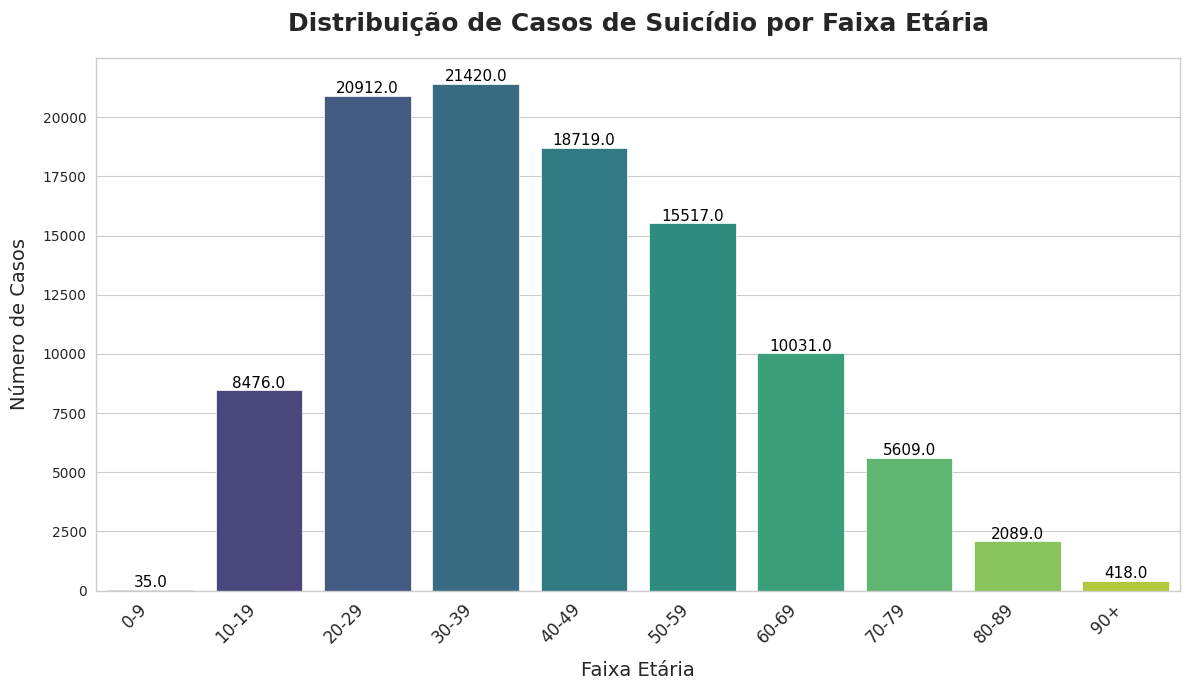

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

suicidio['FAIXA_ETARIA'] = pd.cut(suicidio['IDADE'], bins=bins, labels=labels, right=False)

distribuicao_idade = suicidio['FAIXA_ETARIA'].value_counts().sort_index()
porcentagem_idade = suicidio['FAIXA_ETARIA'].value_counts(normalize=True).sort_index() * 100

print("--- ANÁLISE DA DISTRIBUIÇÃO POR FAIXA ETÁRIA ---")
print("\nContagem de casos de suicídio por faixa etária:")
print(distribuicao_idade)
print("\nPorcentagem de casos de suicídio por faixa etária:")
print(porcentagem_idade)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=distribuicao_idade.index, y=distribuicao_idade.values, palette='viridis')

plt.title('Distribuição de Casos de Suicídio por Faixa Etária', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Faixa Etária', fontsize=14, labelpad=10)
plt.ylabel('Número de Casos', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

### Discussão dos Resultados - Faixa Etária

A análise da distribuição por faixa etária confirma a **Hipótese 3 (H3)**, mostrando que o suicídio é um problema que afeta todas as idades, mas com uma concentração alarmante entre os jovens adultos. As faixas etárias de **20-29 anos** e **30-39 anos** são as que apresentam o maior número de casos, somando juntas mais de **41%** do total.

Isso pode estar relacionado a uma série de fatores de estresse comuns nessa fase da vida, como o início da carreira, a pressão por sucesso financeiro, o estabelecimento de relacionamentos e a busca por identidade.

Também é importante notar que o número de casos permanece alto nas faixas de 40-49 e 50-59 anos, e só então começa a diminuir. Há um novo, embora menor, pico de preocupação entre os idosos (70+), onde o isolamento social, a perda de entes queridos, a depressão e as doenças crônicas podem ser fatores de risco significativos.

**Implicações para a APS:**
- As campanhas de prevenção devem ter um foco prioritário no público jovem (20 a 39 anos), utilizando canais de comunicação e linguagem adequados a essa população (ex: redes sociais, universidades, etc.).
- A APS deve estar preparada para abordar a saúde mental em diferentes fases da vida, com estratégias específicas para jovens adultos, pessoas de meia-idade e idosos.
- Para os idosos, a integração do cuidado em saúde mental com o tratamento de doenças crônicas e o combate ao isolamento social é fundamental.

## Modelagem Estatística - Regressão de Poisson

In [ ]:
# Preparação dos dados para a modelagem

# Certifica que a coluna FAIXA_ETARIA existe
if 'FAIXA_ETARIA' not in suicidio.columns:
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
    suicidio['FAIXA_ETARIA'] = pd.cut(suicidio['IDADE'], bins=bins, labels=labels, right=False)

# Agrupa para criar a contagem de casos
df_modelo = suicidio.groupby(['ANO', 'SEXO', 'RACACOR', 'FAIXA_ETARIA']).size().reset_index(name='CASOS')

# Remove categorias com poucos dados para estabilizar o modelo
df_modelo = df_modelo[df_modelo['RACACOR'] != 'amarela']
df_modelo = df_modelo.dropna() # Remove linhas com NaN (se houver)

print("Amostra dos dados para a modelagem:")
print(df_modelo.head())

# Fórmula do modelo de Poisson
formula = "CASOS ~ C(ANO) + C(SEXO) + C(RACACOR) + C(FAIXA_ETARIA)"

# Ajuste do modelo GLM (Poisson)
modelo_poisson = smf.glm(formula=formula, data=df_modelo, family=sm.families.Poisson()).fit()

# Exibe o resumo do modelo
print(modelo_poisson.summary())

Amostra dos dados para a modelagem:
     ANO SEXO RACACOR FAIXA_ETARIA  CASOS
10  2014    F  branca          0-9      0
11  2014    F  branca        10-19     94
12  2014    F  branca        20-29    162
13  2014    F  branca        30-39    202
14  2014    F  branca        40-49    212
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  CASOS   No. Observations:                  720
Model:                            GLM   Df Residuals:                      698
Model Family:                 Poisson   Df Model:                           21
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4873.3
Date:                Thu, 02 Oct 2025   Deviance:                       6447.1
Time:                        00:15:45   Pearson chi2:                 7.35e+03
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
C

/tmp/ipython-input-1774556812.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_modelo = suicidio.groupby(['ANO', 'SEXO', 'RACACOR', 'FAIXA_ETARIA']).size().reset_index(name='CASOS')


### Visualização e Interpretação dos Fatores Multiplicativos

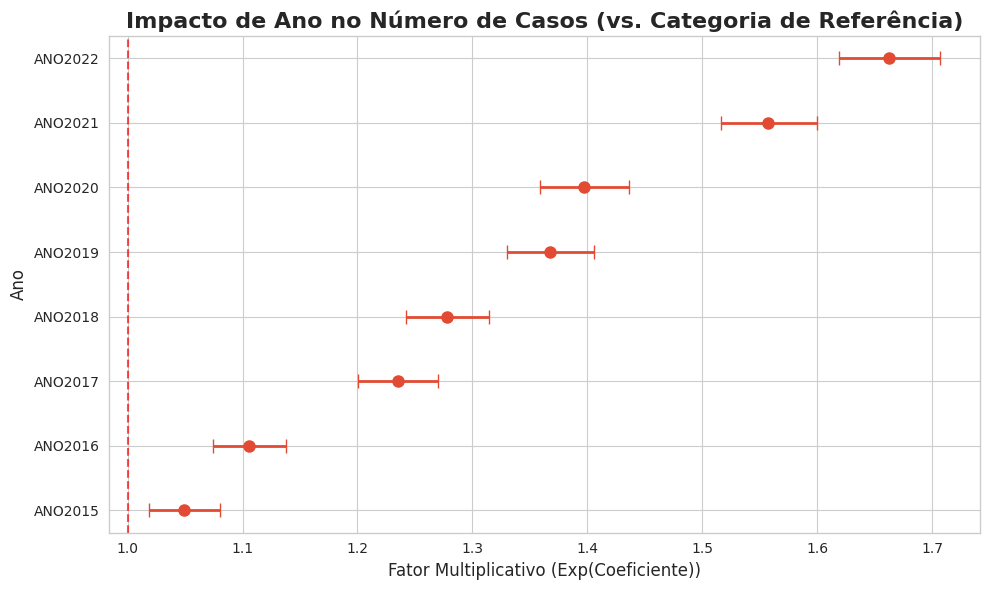

/tmp/ipython-input-3427133172.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grupo['Variavel Limpa'] = pd.Categorical(df_grupo['Variavel Limpa'], categories=ordenacao_faixa, ordered=True)


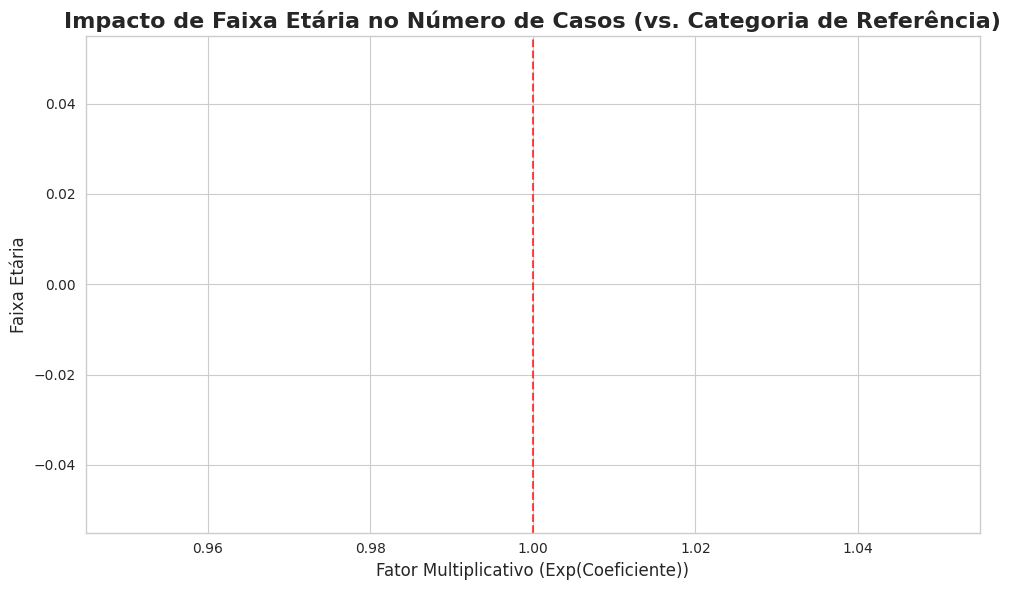

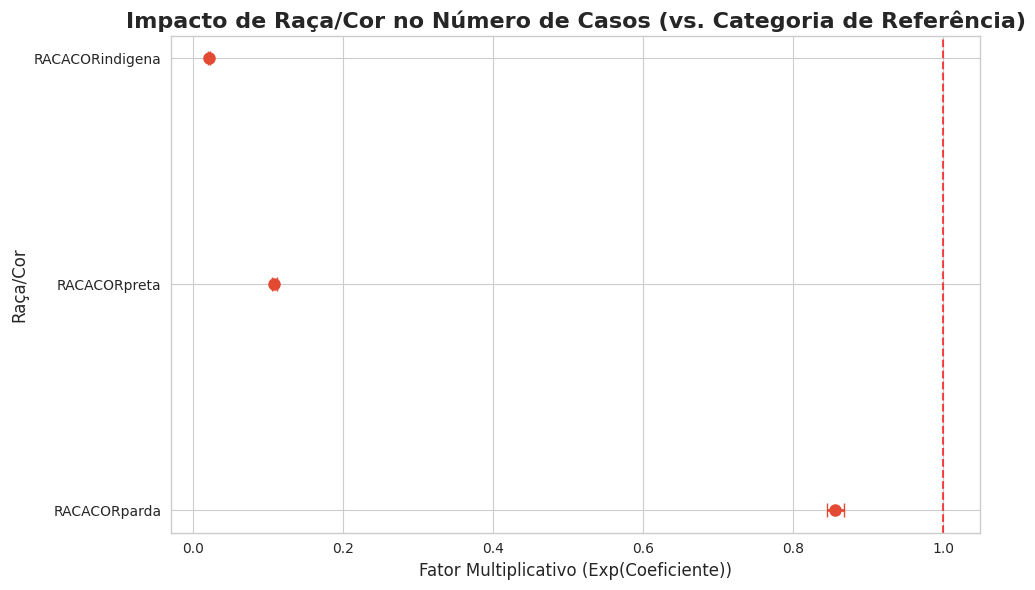

In [ ]:
# PREPARAÇÃO DOS DADOS PARA VISUALIZAÇÃO
resultados_poisson = modelo_poisson.summary2().tables[1].copy()

# Calcula o fator multiplicativo (exponencial do coeficiente) e os intervalos de confiança
resultados_poisson['Fator Multiplicativo'] = np.exp(resultados_poisson['Coef.'])
resultados_poisson['CI_lower'] = np.exp(resultados_poisson['[0.025'])
resultados_poisson['CI_upper'] = np.exp(resultados_poisson['0.975]'])

# Remove o intercepto para focar nas variáveis
if 'Intercept' in resultados_poisson.index:
    resultados_poisson = resultados_poisson.drop('Intercept')

# Limpa os nomes das variáveis para melhor visualização
resultados_poisson['Variavel Limpa'] = resultados_poisson.index.str.replace(r'C\(|\)|\[T\.|\]|\.0', '', regex=True)

# Categoriza as variáveis para criar gráficos separados
def categorizar(v):
    v_lower = v.lower()
    if 'ano' in v_lower or v_lower.startswith('20'): return 'Ano'
    if v_lower in ['m', 'f']: return 'Sexo'
    if any(r in v_lower for r in ['branca', 'parda', 'preta', 'indigena']): return 'Raça/Cor'
    return 'Faixa Etária'

resultados_poisson['Grupo'] = resultados_poisson['Variavel Limpa'].apply(categorizar)

#VISUALIZAÇÃO DOS RESULTADOS
sns.set_style("whitegrid")

for grupo in resultados_poisson['Grupo'].unique():
    df_grupo = resultados_poisson[resultados_poisson['Grupo'] == grupo]
    if not df_grupo.empty:
        plt.figure(figsize=(10, 6))

        # Ordena para melhor visualização
        if grupo == 'Ano': df_grupo = df_grupo.sort_values('Variavel Limpa')
        elif grupo == 'Faixa Etária':
            ordenacao_faixa = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
            df_grupo['Variavel Limpa'] = pd.Categorical(df_grupo['Variavel Limpa'], categories=ordenacao_faixa, ordered=True)
            df_grupo = df_grupo.sort_values('Variavel Limpa')
        else: df_grupo = df_grupo.sort_values('Fator Multiplicativo', ascending=False)

        plt.errorbar(x=df_grupo['Fator Multiplicativo'], y=df_grupo['Variavel Limpa'],
                     xerr=[df_grupo['Fator Multiplicativo'] - df_grupo['CI_lower'],
                           df_grupo['CI_upper'] - df_grupo['Fator Multiplicativo']],
                     fmt='o', capsize=5, elinewidth=2, markersize=8)

        plt.axvline(x=1, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
        plt.title(f'Impacto de {grupo} no Número de Casos (vs. Categoria de Referência)', fontsize=16, fontweight='bold')
        plt.xlabel('Fator Multiplicativo (Exp(Coeficiente))', fontsize=12)
        plt.ylabel(grupo, fontsize=12)
        plt.tight_layout()
        plt.show()

### Discussão dos Resultados - Modelo de Poisson

A regressão de Poisson nos ajuda a entender o impacto de cada variável no número esperado de casos de suicídio, mantendo as outras variáveis constantes. O "Fator Multiplicativo" (ou Razão de Taxa de Incidência - IRR) nos diz o quanto a contagem de suicídios é multiplicada para cada categoria, em comparação com uma categoria de referência.

**Interpretação dos Gráficos:**
- **Linha de Referência (vermelha em x=1):** Se um ponto e seu intervalo de confiança estão à direita desta linha, a categoria tem um número esperado de casos **maior** do que a referência. Se estiver à esquerda, o número esperado é **menor**. Se o intervalo de confiança cruza a linha, a diferença pode não ser estatisticamente significativa.

**Principais Insights do Modelo:**
1.  **Ano:** O gráfico mostra um **aumento progressivo** no fator multiplicativo ao longo dos anos, em comparação com o ano de referência (2014). Isso confirma a tendência de crescimento no número de casos que já havíamos observado na análise exploratória. Por exemplo, o ano de 2022 tem um fator multiplicativo significativamente maior que 1, indicando um aumento no número de casos em relação a 2014, mesmo controlando por outras variáveis.

2.  **Sexo:** O fator multiplicativo para o sexo **Masculino ('M')** é substancialmente maior que 1, em comparação com o sexo Feminino (referência). Isso significa que, mesmo controlando por ano, raça e faixa etária, o número esperado de suicídios para homens é várias vezes maior do que para mulheres. Este é um dos fatores com maior poder explicativo no modelo.

3.  **Raça/Cor:** Comparando com a raça/cor de referência (branca), observamos que os fatores multiplicativos para as outras categorias (parda, preta, indígena) são **menores que 1**. Isso sugere que, controlando pelas outras variáveis, esses grupos têm um número esperado de casos menor do que o grupo de referência (brancos). **Novamente, é crucial lembrar que esta é uma análise de contagem, não de taxas**. A população branca é maior no Brasil, o que influencia a contagem. O resultado do modelo aqui reflete a contagem absoluta de casos, não o risco por habitante.

4.  **Faixa Etária:** O gráfico mostra que, em comparação com a faixa de 0-9 anos (referência), todas as outras faixas etárias têm um fator multiplicativo **extremamente elevado**. Os picos ocorrem nas faixas de **20-29** e **30-39 anos**, confirmando que essas são as idades com a maior contagem esperada de casos. Após os 40 anos, o fator começa a diminuir, mas permanece muito acima da linha de referência até as idades mais avançadas.